###  Librarires 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler


###  Data_set

In [ ]:
forest=pd.read_csv('forestfires.csv')

In [ ]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
col=forest.columns[forest.dtypes=='object']

In [ ]:
col

Index(['month', 'day', 'size_category'], dtype='object')

In [ ]:
for i in col:
    le=LabelEncoder()
    forest[i]=le.fit_transform(forest[i])
    

In [ ]:
forest.duplicated().sum()

8

In [ ]:
forest=forest.drop_duplicates()

In [ ]:
 forest=forest.drop(forest.iloc[:,10:-1],axis=1)

In [ ]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


###  Feature selection

In [ ]:
x=forest.iloc[:,:-1]
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [ ]:
y=forest['size_category']

In [ ]:
y=y.astype('float')

###  using standard scaler

In [ ]:
S=StandardScaler()

In [ ]:
X=S.fit_transform(x)

###  Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 35ms/step - loss: 0.6544 - accuracy: 0.6862 - val_loss: 0.6493 - val_accuracy: 0.6786
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6209 - accuracy: 0.7478 - val_loss: 0.6483 - val_accuracy: 0.6726
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.7566 - val_loss: 0.6550 - val_accuracy: 0.6726
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5797 - accuracy: 0.7566 - val_loss: 0.6668 - val_accuracy: 0.6726
Epoch 5/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5682 - accuracy: 0.7566 - val_loss: 0.6826 - val_accuracy: 0.6726
Epoch 6/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5586 - accuracy: 0.7566 - val_loss: 0.6965 - val_accuracy: 0.6726
Epoch 7/250
7/7 [==============================] - 0s 8ms/step - loss: 0.5514 - accuracy: 0.7566 - val_loss: 0.7071 - val_accuracy: 0.6726
Epoch 8/250
7/7 [=========

In [ ]:
model.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.8271


[0.5450379252433777, 0.8271119594573975]

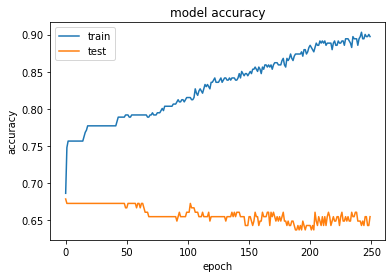

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model2.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 28ms/step - loss: 0.8276 - accuracy: 0.2786 - val_loss: 0.7422 - val_accuracy: 0.4643
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 0.7601 - accuracy: 0.3578 - val_loss: 0.6971 - val_accuracy: 0.5476
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 0.7109 - accuracy: 0.4047 - val_loss: 0.6670 - val_accuracy: 0.5774
Epoch 4/250
7/7 [==============================] - 0s 7ms/step - loss: 0.6713 - accuracy: 0.5718 - val_loss: 0.6515 - val_accuracy: 0.6250
Epoch 5/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.6950 - val_loss: 0.6464 - val_accuracy: 0.6548
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 0.6127 - accuracy: 0.7390 - val_loss: 0.6484 - val_accuracy: 0.6726
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.5916 - accuracy: 0.7566 - val_loss: 0.6570 - val_accuracy: 0.6726
Epoch 8/250
7/7 [=========

In [ ]:
model2.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.8173


[0.8446595072746277, 0.8172888159751892]